# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
api_key = "3459a2dcf595745b70d13f9448a55e38"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 26.891,
        "lat": -33.5906
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 68.27,
        "feels_like": 61.25,
        "temp_min": 68.27,
        "temp_max": 68.27,
        "pressure": 1016,
        "humidity": 89,
        "sea_level": 1016,
        "grnd_level": 1014
    },
    "visibility": 10000,
    "wind": {
        "speed": 21.77,
        "deg": 59,
        "gust": 32.86
    },
    "clouds": {
        "all": 92
    },
    "dt": 1617063586,
    "sys": {
        "country": "ZA",
        "sunrise": 1617078175,
        "sunset": 1617120635
    },
    "timezone": 7200,
    "id": 964432,
    "name": "Port Alfred",
    "cod": 200
}


In [5]:
print(requests.get(query_url + city))

<Response [200]>


In [6]:
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

processing_record = 1

for city in cities:

    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue


Processing Record 1 | Hilo
Processing Record 2 | Clyde River
Processing Record 3 | Geraldton
Processing Record 4 | Baní
Processing Record 5 | Bambous Virieux
City not found. Skipping...
Processing Record 6 | Raudeberg
Processing Record 7 | Bella Union
Processing Record 8 | Busselton
Processing Record 9 | Ampanihy
Processing Record 10 | East London
City not found. Skipping...
Processing Record 11 | Kalevala
Processing Record 12 | Chokurdakh
Processing Record 13 | Airai
Processing Record 14 | Inongo
Processing Record 15 | Vestmannaeyjar
Processing Record 16 | Port Alfred
Processing Record 17 | Punta Arenas
Processing Record 18 | Gubkinskiy
Processing Record 19 | Alta Floresta
Processing Record 20 | Sørland
Processing Record 21 | Kavaratti
City not found. Skipping...
Processing Record 22 | Ushuaia
Processing Record 23 | Omsukchan
Processing Record 24 | Bengkulu
Processing Record 25 | Upington
Processing Record 26 | Karratha
Processing Record 27 | Praia
Processing Record 28 | Avarua
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City               578
Country            578
Date               578
Latitude           578
Longitude          578
Max Temperature    578
Humidity           578
Cloudiness         578
Wind Speed         578
dtype: int64

In [8]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Hilo,US,1617063588,19.7297,-155.0900,78.8,61,40,6.91
1,Clyde River,CA,1617063588,70.4692,-68.5914,-7.6,84,90,16.11
2,Geraldton,AU,1617063589,-28.7667,114.6000,75.2,69,75,9.22
3,Baní,DO,1617063589,18.2833,-70.3333,81.0,77,3,11.39
4,Bambous Virieux,MU,1617063589,-20.3428,57.7575,75.0,94,20,8.05


In [9]:
weather_df.to_csv("c://user/ilariatare/Desktop/Class/weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df['Humidity'] > 100]

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed


In [11]:
print("the maximum humidity value is 100%, so there are no values greater than 100% in our data!")

the maximum humidity value is 100%, so there are no values greater than 100% in our data!


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

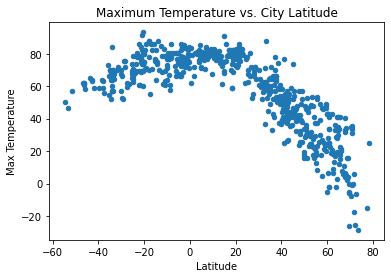

In [12]:
lat_vs_Temp = weather_df.plot(kind="scatter", x="Latitude", y="Max Temperature", 
                                      title= "Maximum Temperature vs. City Latitude")

lat_vs_Temp.get_figure().savefig("../output_data/Temp_vs_Latitude_All_Cities.png")

## Latitude vs. Humidity Plot

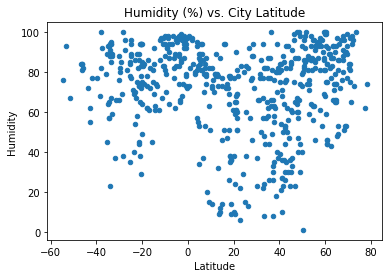

In [13]:
lat_vs_humidity = weather_df.plot(kind="scatter", x="Latitude", y="Humidity", 
                                      title="Humidity (%) vs. City Latitude")

lat_vs_humidity.get_figure().savefig("../output_data/Humidity_vs_Latitude_All_Cities.png")

## Latitude vs. Cloudiness Plot

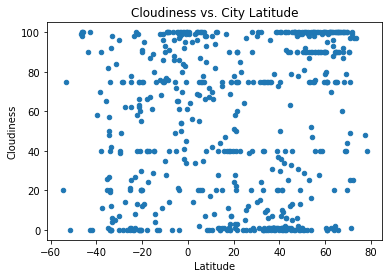

In [14]:
lat_vs_cloudiness = weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness", 
                                      title="Cloudiness vs. City Latitude")

lat_vs_cloudiness.get_figure().savefig("../output_data/Cloudiness_vs_Latitude_All_Cities.png")

## Latitude vs. Wind Speed Plot

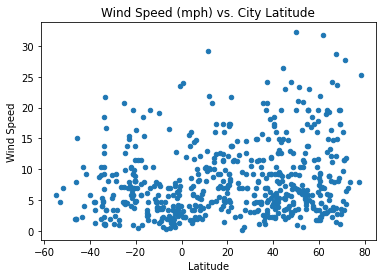

In [15]:
lat_vs_windspeed = weather_df.plot(kind="scatter", x="Latitude", y="Wind Speed", 
                                      title="Wind Speed (mph) vs. City Latitude")

lat_vs_windspeed.get_figure().savefig("../output_data/Wind_Speed_vs_Latitude_All_Cities.png")

## Linear Regression

In [3]:
def makeLinRegression(df, x_Col, y_Col):
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], 
                                                           df[y_Col])
    regr_line_x = np.array([a for a in range(int(min(df[x_Col].values)), int(max(df[x_Col].values)+1))])
    regr_line_y = regr_slope * regr_line_x + regr_intercept

    df_axes = df.plot(kind="scatter", x=x_Col, y=y_Col, 
                      title="{} vs. {} ({})"
                        .format(y_Col, x_Col, weather_df["Datetime (Local)"].iloc[0].split(",")[0]))

    df_axes.plot(regr_line_x, regr_line_y, 'r')
                  
    return df_axes

In [5]:
northern_hemisphere = weather_df.loc[weather_df["Latitude"] > 0]
northern_cities_count = len(northern_hemisphere)
print("There are {} cities in the northern hemisphere out of {} cities total"
     .format(northern_cities_count,(northern_cities_count))


southern_hemisphere = weather_df.loc[weather_df["Latitude"] <= 0]
southern_cities_count = len(southern_hemisphere)
print("There are {} cities in the southern hemisphere out of {} cities total"
     .format(southern_cities_count,(southern_cities_count))


SyntaxError: invalid syntax (<ipython-input-5-61b36834203d>, line 7)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [6]:
(n_temp_slope, n_temp_intercept, n_temp_r_val, _, _) = linregress(northern_hemisphere["Latitude"], 
                                                           northern_hemisphere["Max Temperature"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_temp_slope * regr_line_x + n_temp_intercept

n_temp = northern_hemisphere.plot(kind="scatter", x="Latitude", 
                                       y="Max Temperature", 
                                       title="Max Temperature (F) vs. Actual Latitude ({})".
                                       format(weather_df["Datetime (Local)"].iloc[0].split(",")[0]))
                        

n_temp.plot(regr_line_x, regr_line_y, 'r')


NameError: name 'linregress' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
(s_temp_slope, s_temp_intercept, s_temp_r_val, _, _) = linregress(southern_hemisphere["Latitude"], 
                                                           southern_hemisphere["Max Temperature"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = s_temp_slope * regr_line_x + s_temp_intercept

s_temp = southern_hemisphere.plot(kind="scatter", x="Latitude", 
                                       y="Max Temperature", 
                                       title="Max Temperature (F) vs. Actual Latitude ({})".
                                       format(weather_df["Datetime (Local)"].iloc[0].split(",")[0]))
                        

s_temp.plot(regr_line_x, regr_line_y, 'r')

NameError: name 'southern_hemisphere' is not defined

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [21]:
n_humidity_lat_axes = makeLinRegression(northern_hemisphere, "Latitude", "Humidity")
n_humidity_lat_axes.get_figure().savefig("../output_data/Humidity_vs_Latitude_N_Hemisphere.png")

NameError: name 'northern_hemisphere' is not defined

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [22]:
s_humidity_lat_axes = makeLinRegression(southern_hemisphere, "Latitude", "Humidity")
s_humidity_lat_axes.get_figure().savefig("../output_data/Humidity_vs_Latitude_S_Hemisphere.png")

NameError: name 'southern_hemisphere' is not defined

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:
n_cloudiness_lat_axes = makeLinRegression(northern_hemisphere, "Latitude", "Cloudiness")
n_cloudiness_lat_axes.get_figure().savefig("../output_data/Cloudiness_vs_Latitude_N_Hemisphere.png")

NameError: name 'northern_hemisphere' is not defined

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [25]:
s_cloudiness_lat_axes = makeLinRegression(southern_hemisphere, "Latitude", "Cloudiness")
s_cloudiness_lat_axes.get_figure().savefig("../output_data/Cloudiness_vs_Latitude_S_Hemisphere.png")

NameError: name 'southern_hemisphere' is not defined

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [26]:
n_wind_lat_axes = makeLinRegression(northern_hemisphere, "Latitude", "Wind Speed")
n_wind_lat_axes.get_figure().savefig("../output_data/Wind_Speed_vs_Latitude_N_Hemisphere.png")

NameError: name 'northern_hemisphere' is not defined

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [1]:
s_wind_lat_axes=makeLinRegression(southern_hemisphere, "Latitude", "Wind Speed")
s_wind_lat_axes.get_figure().savefig("../output_data/Wind_Speed_vs_Latitude_S_Hemisphere.png")

NameError: name 'makeLinRegression' is not defined